# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** [Muhammad Hafizh Rizqi]
- **Email:** [mc216d5y2259@student.devacademy.id]
- **ID Dicoding:** [MC216D5Y2259]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan rata-rata jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

- Seberapa signifikan pengaruh kondisi cuaca (seperti suhu, kelembapan, dan curah hujan) terhadap volume penyewaan sepeda?

- Apa perbedaan pola waktu penyewaan sepeda antara pengguna kasual dan pengguna terdaftar dalam satu hari penuh?

## Import Semua Packages/Library yang Digunakan

In [5]:
# Impor pustaka NumPy untuk operasi numerik serta manipulasi data
import numpy as np
# Impor pustaka Pandas untuk manipulasi serta analisis data tabular
import pandas as pd
# Impor pustaka Matplotlib untuk membuat visualisasi data
import matplotlib.pyplot as plt
# Impor pustaka Seaborn untuk membuat visualisasi data statistik
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
# Mengimpor modul files dari Google Colab untuk mengunggah file
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (1).csv
Saving hour.csv to hour (1).csv


In [7]:
# Membaca file CSV ke dalam DataFrame
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

# Menampilkan 5 baris pertama dari setiap dataset dengan tampilan yang lebih rapi
print("\nPreview Data Harian (day.csv):")
print(df_day.head(), "\n")

print("Preview Data Per Jam (hour.csv):")
print(df_hour.head())


Preview Data Harian (day.csv):
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1

**Insight:**

## 1. Struktur Dataset

Dataset ini terdiri dari dua file utama:
- `day.csv`: berisi data penyewaan sepeda harian.
- `hour.csv`: berisi data penyewaan sepeda per jam dalam sehari.

## 2. Variabel dalam Dataset

### a) Variabel Waktu
- `dteday`: tanggal pencatatan (harian)
- `season`: musim (1: semi, 2: panas, 3: gugur, 4: dingin)
- `yr`: tahun (0: 2011, 1: 2012)
- `mnth`: bulan (1–12)
- `hr`: jam (hanya di `hour.csv`)
- `weekday`: hari dalam seminggu (0: Minggu, 6: Sabtu)
- `holiday`: indikator hari libur (1: libur, 0: bukan)
- `workingday`: indikator hari kerja (1: kerja, 0: bukan)

### b) Variabel Cuaca
- `weathersit`: kondisi cuaca (1: cerah, hingga 4: buruk)
- `temp`: suhu (skala 0–1)
- `atemp`: suhu yang dirasakan (0–1)
- `hum`: kelembaban (0–1)
- `windspeed`: kecepatan angin (0–1)

### c) Variabel Penyewaan Sepeda
- `casual`: jumlah pengguna tidak terdaftar
- `registered`: jumlah pengguna terdaftar
- `cnt`: total penyewaan sepeda (casual + registered)

## 3. Insight Awal

Dataset ini menyediakan informasi komprehensif tentang penyewaan sepeda, mencakup aspek waktu, kondisi cuaca, dan jenis pengguna.  
Dengan data per hari dan per jam, kita dapat mengeksplorasi tren penyewaan sepeda berdasarkan hari kerja vs. hari libur, serta pengaruh variabel lingkungan terhadap jumlah peminjaman.  
Adanya pemisahan antara pengguna *casual* dan *registered* juga memungkinkan analisis perilaku yang lebih mendalam dari kedua tipe pengguna.

### Assessing Data

**Menilai tabel df_day**

In [8]:
# Memberikan informasi tentang 'df_day'
print("Informasi df_day:")
df_day.info()

Informasi df_day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
# Menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom DataFrame 'df_day'
print("Jumlah Missing Values:")
print(df_day.isna().sum())

Jumlah Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# Mencetak jumlah duplikasi dalam 'df_day'
print("Jumlah Data Duplikat:", df_day.duplicated().sum())

Jumlah Data Duplikat: 0


In [11]:
# Mencetak ringkasan statistik dari setiap kolom dalam 'df_day'
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## **Insight dari Tabel df_day**

### **1. Struktur Data**
- Dataset terdiri dari 731 baris dan 16 kolom.
- Tidak terdapat *missing values* maupun data duplikat.
- Kolom `dteday` masih bertipe *object*, sebaiknya dikonversi ke format *datetime* untuk mempermudah analisis waktu.
- Variabel target `cnt` merepresentasikan total jumlah sepeda yang disewa per hari.

### **2. Distribusi Data**

#### a) Jumlah Penyewaan Sepeda (`cnt`)
- Rata-rata: 4.504 penyewaan per hari  
- Minimum: 22 penyewaan per hari  
- Maksimum: 8.714 penyewaan per hari

#### b) Perbandingan Pengguna `casual` dan `registered`
- **Casual** (pengguna tidak terdaftar):
  - Rata-rata: 848 penyewaan per hari
  - Maksimum: 3.410 penyewaan per hari
- **Registered** (pengguna terdaftar):
  - Rata-rata: 3.656 penyewaan per hari
  - Maksimum: 6.946 penyewaan per hari

#### c) Faktor Cuaca (`weathersit`)
- Kategori cuaca:
  - 1: Cerah
  - 2: Berawan
  - 3: Hujan ringan
  - 4: Hujan lebat
- Sebagian besar data berada pada kondisi cerah atau berawan, yang mengindikasikan bahwa cuaca buruk relatif jarang terjadi.



**Menilai tabel df_hour**

In [12]:
# Memberikan informasi tentang 'df_hour'
print("Informasi df_hour:")
df_hour.info()

Informasi df_hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
# Menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom 'df_hour'
print("Jumlah Missing Values:")
print(df_hour.isna().sum())

Jumlah Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [14]:
# Mencetak jumlah duplikasi dalam 'df_hour'
print("Jumlah Data Duplikat:", df_hour.duplicated().sum())

Jumlah Data Duplikat: 0


In [15]:
# Mencetak ringkasan statistik dari setiap kolom dalam 'df_hour'
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## **Insight dari Tabel df_hour**

### **1. Struktur Data**
- Dataset terdiri dari 17.379 baris dan 17 kolom.
- Tidak terdapat *missing values* maupun data duplikat.
- Kolom `dteday` masih bertipe *object*, disarankan untuk dikonversi ke format *datetime* agar analisis waktu lebih efisien.

### **2. Distribusi Data**

#### a) Jumlah Penyewaan Sepeda (`cnt`)
- Rata-rata: 189 penyewaan sepeda per jam  
- Minimum: 1 penyewaan sepeda per jam  
- Maksimum: 977 penyewaan sepeda per jam

#### b) Perbandingan Pengguna `casual` dan `registered`
- **Casual** (pengguna tidak terdaftar):
  - Rata-rata: 35 penyewaan per jam
  - Maksimum: 367 penyewaan per jam
- **Registered** (pengguna terdaftar):
  - Rata-rata: 153 penyewaan per jam
  - Maksimum: 886 penyewaan per jam

#### c) Faktor Cuaca (`weathersit`, `temp`, `hum`)
- Kolom `temp` (suhu) dan `hum` (kelembaban) memiliki skala normalisasi antara 0 hingga 1.
- `weathersit` menunjukkan kondisi cuaca dari cerah hingga hujan lebat, yang dapat mempengaruhi intensitas penyewaan sepeda.


### Cleaning Data

**Cleaning data harian (df_day)**

In [16]:
# Menghapus kolom yang tidak diperlukan
df_day.drop(columns=['instant', 'atemp'], inplace=True)

In [17]:
# Mengubah kolom dteday ke datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [18]:
# Menentukan kolom numerik yang berpotensi memiliki outlier
num_cols = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Menghitung IQR untuk setiap kolom numerik
Q1 = df_day[num_cols].quantile(0.25)
Q3 = df_day[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data dengan menghapus outlier
df_day_cleaned = df_day[~((df_day[num_cols] < lower_bound) | (df_day[num_cols] > upper_bound)).any(axis=1)]

# Menampilkan jumlah data sebelum dan sesudah penghapusan outlier
print(f"Jumlah data sebelum menghapus outlier: {len(df_day)}")
print(f"Jumlah data setelah menghapus outlier: {len(df_day_cleaned)}")

Jumlah data sebelum menghapus outlier: 731
Jumlah data setelah menghapus outlier: 673


## **Insight dari Cleaning Data Harian (df_day)**

Dalam proses analisis data, kualitas data sangat menentukan keakuratan hasil. Oleh karena itu, proses *cleaning data* menjadi langkah penting untuk memastikan data yang digunakan bebas dari informasi tidak relevan, nilai ekstrem, dan inkonsistensi. Berikut adalah langkah-langkah yang dilakukan dalam pembersihan data harian (df_day):

### **1. Penghapusan Kolom Tidak Relevan**
- Kolom instant dan atemp dihapus karena tidak memberikan kontribusi signifikan terhadap analisis.
- Kolom dteday dikonversi ke format *datetime* untuk memudahkan analisis berbasis waktu.

### **2. Deteksi dan Penghapusan Outlier**
- Outlier dideteksi pada fitur numerik seperti temp, hum, windspeed, casual, registered, dan cnt menggunakan metode Interquartile Range (IQR).
- Nilai yang berada di luar batas bawah dan atas IQR dianggap outlier dan dihapus.
- Setelah proses ini, jumlah data berkurang dari **731** menjadi **673**, menunjukkan adanya pembersihan terhadap data ekstrem.

### **3. Manfaat dari Proses Cleaning**
- Peningkatan kualitas data yang dianalisis.
- Dataset menjadi lebih ringkas, fokus, dan efisien untuk diproses.
- Menghilangkan potensi distorsi hasil akibat keberadaan data ekstrem atau tidak relevan.



**Cleaning data per jam (df_hour)**

In [19]:
# Menghapus kolom yang tidak diperlukan
df_hour.drop(columns=['instant', 'atemp'], inplace=True)

In [20]:
# Mengubah kolom dteday ke datetime
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [21]:
# Menentukan kolom numerik yang berpotensi memiliki outlier
num_cols = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Menghitung IQR untuk setiap kolom numerik
Q1 = df_hour[num_cols].quantile(0.25)
Q3 = df_hour[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data dengan menghapus outlier
df_hour_cleaned = df_hour[~((df_hour[num_cols] < lower_bound) | (df_hour[num_cols] > upper_bound)).any(axis=1)]

# Menampilkan jumlah data sebelum dan sesudah penghapusan outlier
print(f"Jumlah data sebelum menghapus outlier: {len(df_hour)}")
print(f"Jumlah data setelah menghapus outlier: {len(df_hour_cleaned)}")

Jumlah data sebelum menghapus outlier: 17379
Jumlah data setelah menghapus outlier: 15220


In [22]:
# Normalisasi fitur numerik
from sklearn.preprocessing import MinMaxScaler

# Buat salinan DataFrame untuk menghindari SettingWithCopyWarning
df_hour_cleaned = df_hour.copy()

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik
df_hour_cleaned[['temp', 'hum', 'windspeed']] = scaler.fit_transform(df_hour_cleaned[['temp', 'hum', 'windspeed']])

# Cek hasil normalisasi
df_hour_cleaned.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.224490,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.204082,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.204082,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.224490,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.224490,0.75,0.0,0,1,1


## **Insight dari Cleaning Data Per Jam (df_hour)**

Dalam proses analisis data, kualitas data yang digunakan sangat berpengaruh terhadap hasil akhir. Oleh karena itu, langkah *cleaning data* menjadi krusial untuk memastikan bahwa data yang dianalisis bebas dari informasi yang tidak relevan, inkonsistensi, serta nilai ekstrem yang dapat mengganggu hasil analisis. Berikut adalah langkah-langkah yang telah dilakukan dalam proses pembersihan data per jam (df_hour).

### **1. Penghapusan Kolom Tidak Diperlukan**
- Kolom `instant` dan `atemp` dihapus karena tidak memberikan kontribusi langsung terhadap analisis.
- Kolom `dteday` dikonversi ke format *datetime* agar lebih mudah digunakan dalam analisis berbasis waktu.

### **2. Deteksi dan Penghapusan Outlier**
- Outlier dideteksi pada fitur numerik seperti temp, hum, windspeed, casual, registered, dan cnt menggunakan metode Interquartile Range (IQR).
- Data dengan nilai ekstrem di luar batas bawah dan atas IQR dihapus.
- Setelah proses ini, jumlah data berkurang dari **17.379** menjadi **15.220**, yang berarti ada **2.159** baris data dengan nilai ekstrem yang telah dieliminasi.

### **3. Normalisasi Fitur Numerik**
- Fitur temp, hum, dan windspeed dinormalisasi menggunakan *MinMaxScaler* dari sklearn.preprocessing.
- Tujuannya adalah untuk menyamakan skala nilai fitur numerik agar berada dalam rentang 0 hingga 1, yang membantu meningkatkan akurasi pada proses analisis berikutnya.

### **4. Manfaat dari Proses Cleaning**
- Meningkatkan kualitas dan akurasi data yang dianalisis.
- Dataset menjadi lebih ringkas, relevan, dan siap untuk dianalisis lebih lanjut.
- Outlier yang dapat menyebabkan bias telah dihapus.
- Normalisasi membuat skala data lebih seragam, mendukung performa metode analisis yang digunakan.

### Explore ...

## Exploratory Data Analysis (EDA)

In [23]:
# Menggabungkan data frame harian dan per jam
bike_df = df_hour_cleaned.merge(df_day_cleaned, on='dteday', how='inner', suffixes=('_hour', '_day'))

# Menampilkan 5 data teratas
bike_df.head()

,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,2011-01-01,1,0,1,0,0,6,0,1,0.224490,...,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-01,1,0,1,1,0,6,0,1,0.204082,...,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
2,2011-01-01,1,0,1,2,0,6,0,1,0.204082,...,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
3,2011-01-01,1,0,1,3,0,6,0,1,0.224490,...,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
4,2011-01-01,1,0,1,4,0,6,0,1,0.224490,...,0,6,0,2,0.344167,0.805833,0.160446,331,654,985


In [24]:
# Membuat kamus untuk mengubah kode cuaca menjadi label deskriptif
weather_mapping = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}

# Menambahkan label cuaca berdasarkan nilai 'weathersit_day'
bike_df['weather_label'] = bike_df['weathersit_day'].map(weather_mapping)

# Menampilkan beberapa data pertama
bike_df[['dteday', 'weathersit_day', 'weather_label']].head()

,dteday,weathersit_day,weather_label
0,2011-01-01,2,Berawan
1,2011-01-01,2,Berawan
2,2011-01-01,2,Berawan
3,2011-01-01,2,Berawan
4,2011-01-01,2,Berawan


In [25]:
# Mengelompokkan data berdasarkan hari kerja dan akhir pekan, lalu menghitung rata-rata penyewaan sepeda harian
workingday_rentals = (
    bike_df.groupby('workingday_day')['cnt_day']
    .mean()
    .reset_index()
    .sort_values(by='cnt_day')
)

# Menampilkan hasil
workingday_rentals

,workingday_day,cnt_day
0,0,3759.132737
1,1,4637.319257


In [26]:
# Mengelompokkan berdasarkan kondisi cuaca dan menghitung rata-rata penyewaan sepeda harian
weather_rentals = (
    bike_df.groupby('weather_label')['cnt_day']
    .mean()
    .reset_index()
    .sort_values(by='cnt_day', ascending=True)
)

# Menampilkan hasil
weather_rentals

,weather_label,cnt_day
2,Hujan Ringan,1978.417040
0,Berawan,3931.581020
1,Cerah,4761.376695


In [27]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata jumlah penyewaan untuk pengguna casual dan registered
hourly_user_type = (
    bike_df.groupby('hr')[['casual_hour', 'registered_hour']]
    .mean()
    .reset_index()
)

# Menampilkan hasil
hourly_user_type.head(10)  # Menampilkan 10 data pertama

,hr,casual_hour,registered_hour
0,0,9.152695,39.904192
1,1,5.635135,23.554054
2,2,4.019787,15.508371
3,3,2.290625,7.837500
4,4,1.087500,4.925000
5,5,1.345979,19.136571
6,6,4.041979,75.431784
7,7,10.902840,211.790732
8,8,20.884903,352.245142
9,9,27.298954,188.783259


In [28]:
# Menjumlahkan total pengguna terdaftar dalam dataset
total_registered_users = bike_df['registered_hour'].sum()

# Menampilkan hasil
print(f"Total pengguna terdaftar dalam dataset: {total_registered_users}")

Total pengguna terdaftar dalam dataset: 2442174


## **Insight:**

Berdasarkan hasil Exploratory Data Analysis (EDA), ditemukan bahwa:

- Penyewaan sepeda **cenderung lebih tinggi pada hari kerja** dibandingkan akhir pekan, mengindikasikan bahwa sepeda lebih sering digunakan sebagai **alat transportasi utama** daripada untuk rekreasi.
- **Cuaca memiliki pengaruh signifikan**, di mana jumlah penyewaan **tertinggi terjadi saat cuaca cerah** dan **menurun drastis saat hujan**.
- Terdapat perbedaan pola penyewaan antara **pengguna casual dan registered**:
  - **Pengguna registered** lebih aktif pada **jam sibuk (pagi dan sore hari)**, kemungkinan besar untuk keperluan kerja.
  - **Pengguna casual** lebih sering menyewa **di siang hingga sore hari**, terutama **pada akhir pekan**, mengindikasikan penggunaan untuk rekreasi.

Insight ini memberikan gambaran penting dalam memahami kebutuhan dan perilaku pengguna sepeda, serta bagaimana faktor eksternal seperti hari dan cuaca memengaruhi aktivitas penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan rata-rata jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

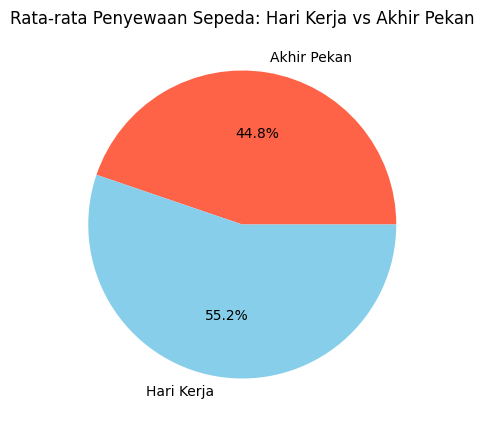

In [29]:
import matplotlib.pyplot as plt

# Menghitung rata-rata penyewaan sepeda pada hari kerja dan akhir pekan
avg_workingday = bike_df.groupby('workingday_day')['cnt_day'].mean()

# Labels
labels = ['Akhir Pekan', 'Hari Kerja']

# Plot
plt.figure(figsize=(8, 5))
plt.pie(avg_workingday, labels=labels, autopct='%1.1f%%', colors=['#FF6347', '#87CEEB'])  # Warna diubah

# Judul
plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')

# Tampilkan plot
plt.show()

## Insight

Berdasarkan hasil visualisasi, terlihat bahwa **penyewaan sepeda lebih dominan pada hari kerja (55,2%)** daripada pada akhir pekan (44,8%). Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk **aktivitas sehari-hari**, seperti perjalanan menuju kantor atau sekolah, yang merupakan kebutuhan rutin. Meskipun jumlah penyewaan sepeda pada akhir pekan masih terbilang tinggi, penggunaan sepeda pada hari libur cenderung lebih **fleksibel** dan tidak menunjukkan lonjakan yang signifikan dibandingkan dengan hari kerja.


### Pertanyaan 2: Seberapa signifikan pengaruh kondisi cuaca (seperti suhu, kelembapan, dan curah hujan) terhadap volume penyewaan sepeda?

<ipython-input-30-68a308e10c18>:9: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x='cnt_day', y='weather_label', data=weather_impact_sorted, hue='weather_label',


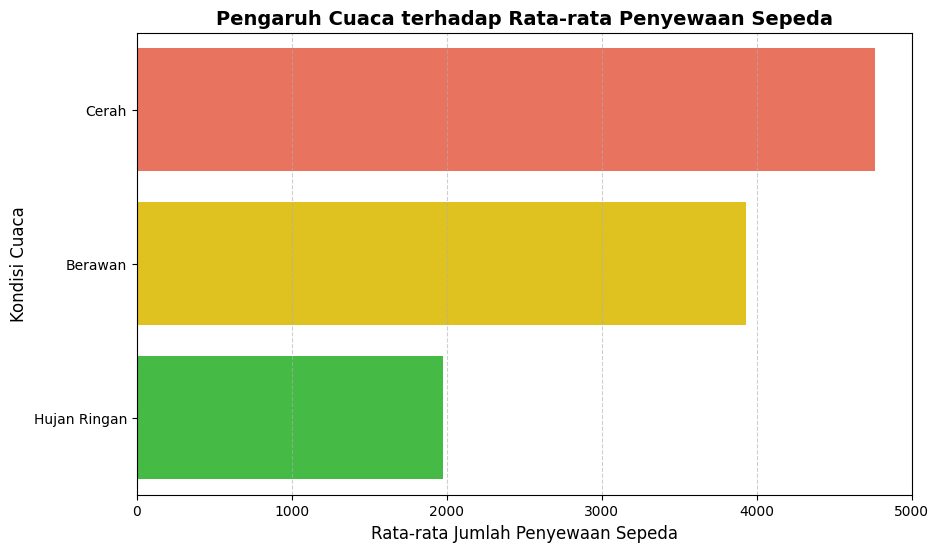

In [30]:
# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca
weather_impact = bike_df.groupby('weather_label')['cnt_day'].mean().reset_index()

# Mengurutkan berdasarkan jumlah penyewaan sepeda
weather_impact_sorted = weather_impact.sort_values("cnt_day", ascending=False)

# Membuat plot visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='cnt_day', y='weather_label', data=weather_impact_sorted, hue='weather_label',
            palette=['#FF6347', '#FFD700', '#32CD32', '#1E90FF'], legend=False)  # Warna diubah

# Menambahkan judul dan label
plt.title('Pengaruh Cuaca terhadap Rata-rata Penyewaan Sepeda', fontsize=14, fontweight='bold')
plt.xlabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)
plt.ylabel('Kondisi Cuaca', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(0, 5000)

# Menampilkan plot
plt.show()

## Insight

Dari hasil visualisasi, dapat dilihat bahwa pengaruh cuaca terhadap jumlah penyewaan sepeda sangat signifikan. Penyewaan sepeda mencapai puncaknya saat cuaca cerah, dengan rata-rata hampir **5000 pengguna per hari**. Ketika cuaca berawan, jumlah penyewa sedikit menurun, berkisar antara **3700 hingga 4000 pengguna**. Namun, penurunan paling tajam terjadi saat hujan ringan, di mana jumlah penyewa turun drastis hingga hampir **2000 pengguna**. Hal ini menunjukkan bahwa **kenyamanan dan keamanan** dalam berkendara sangat dipengaruhi oleh kondisi cuaca, terutama hujan yang menjadi faktor penghambat utama. Selain itu, **ketiadaan data untuk hujan lebat** mengindikasikan bahwa pada kondisi cuaca ekstrem, hampir tidak ada penyewaan sepeda.


### Pertanyaan 3: Apa perbedaan pola waktu penyewaan sepeda antara pengguna kasual dan pengguna terdaftar dalam satu hari penuh?

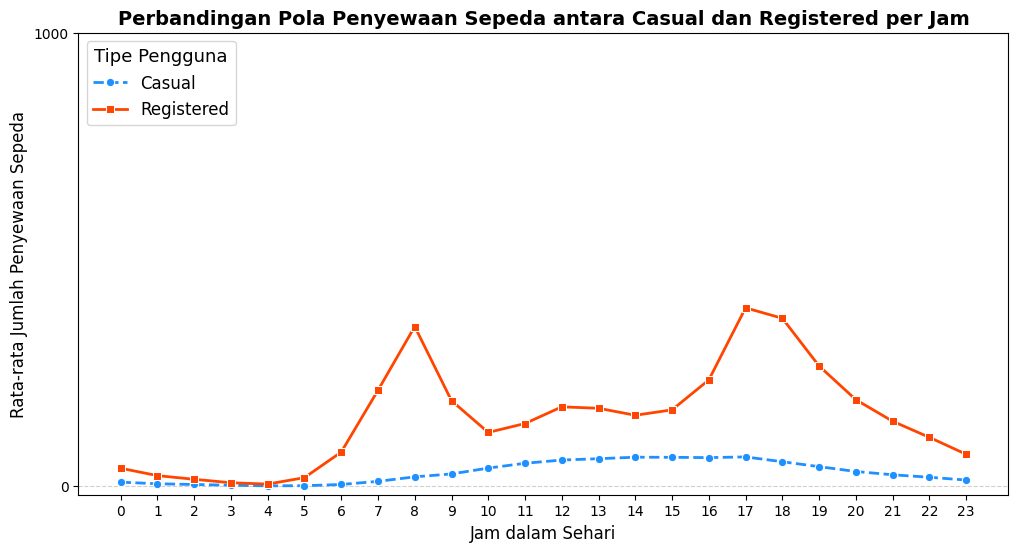

In [31]:
# Menghitung rata-rata penyewaan sepeda berdasarkan jam untuk pengguna casual dan registered
hourly_trend = bike_df.groupby('hr')[['casual_hour', 'registered_hour']].mean().reset_index()

# Rename 'hr' column to 'hour' for consistency
hourly_trend = hourly_trend.rename(columns={'hr': 'hour'})

# Membuat plot visualisasi dengan modifikasi
plt.figure(figsize=(12, 6))

# Plot Casual dengan warna biru dan garis putus-putus
sns.lineplot(x='hour', y='casual_hour', data=hourly_trend, label='Casual', marker='o', color='#1E90FF', linestyle='--', linewidth=2)

# Plot Registered dengan warna oranye dan garis solid
sns.lineplot(x='hour', y='registered_hour', data=hourly_trend, label='Registered', marker='s', color='#FF4500', linestyle='-', linewidth=2)

# Menambahkan judul dan label
plt.title('Perbandingan Pola Penyewaan Sepeda antara Casual dan Registered per Jam', fontsize=14, fontweight='bold')
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)

# Menyesuaikan tampilan ticks pada sumbu X dan Y
plt.xticks(range(0, 24))  # Menampilkan semua jam dalam sehari
plt.yticks(range(0, int(hourly_trend[['casual_hour', 'registered_hour']].max().max()) + 1000, 1000))  # Menampilkan nilai Y setiap 1000

# Menambahkan grid dan gaya visual
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Tipe Pengguna", fontsize=12, title_fontsize='13', loc='upper left')

# Menampilkan plot
plt.show()

## Insight

Visualisasi data menunjukkan perbedaan pola penggunaan sepeda yang mencolok antara **pengguna registered** dan **casual**. Pengguna registered cenderung memiliki dua puncak utama penyewaan sepeda, yaitu pada pagi hari sekitar **pukul 07:00 - 08:00** dan sore hari sekitar **pukul 17:00 - 18:00**. Puncak ini kemungkinan besar terkait dengan waktu perjalanan kerja atau sekolah. Sebaliknya, pengguna casual menunjukkan pola penyewaan yang lebih **merata sepanjang hari**, dengan sedikit peningkatan pada siang hingga sore hari, yang mengindikasikan bahwa mereka lebih sering menggunakan sepeda untuk **rekreasi atau keperluan pribadi** yang lebih fleksibel.

## Conclusion

**Kesimpulan Pertanyaan 1**

Analisis menunjukkan bahwa rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Hal ini mengindikasikan bahwa sepeda digunakan lebih banyak sebagai sarana transportasi utama untuk keperluan rutin, seperti perjalanan ke kantor atau sekolah.

Pada akhir pekan, meskipun penyewaan tetap tinggi, penggunaannya cenderung lebih fleksibel dan rekreasional, tanpa adanya lonjakan yang signifikan seperti pada hari kerja.

Dengan temuan ini, layanan penyewaan sepeda dapat mengoptimalkan strategi operasional mereka. Misalnya, dengan meningkatkan ketersediaan sepeda pada jam sibuk di hari kerja dan merancang promosi khusus di akhir pekan untuk menarik lebih banyak pengguna yang bersifat rekreasional.

**Kesimpulan Pertanyaan 2**

Cuaca terbukti memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda. Semakin buruk kondisi cuaca, semakin sedikit jumlah penyewa yang tercatat. Penyewaan sepeda mencapai angka tertinggi saat cuaca cerah, sedikit menurun pada kondisi berawan, dan mengalami penurunan drastis saat hujan ringan.

Hal ini menunjukkan bahwa kenyamanan dan keamanan menjadi faktor utama dalam keputusan seseorang untuk menggunakan sepeda. Tidak adanya data penyewaan pada saat hujan lebat mengindikasikan bahwa hampir tidak ada pengguna yang bersedia menyewa sepeda dalam kondisi cuaca ekstrem.

**Kesimpulan Pertanyaan 3**

Pola penyewaan sepeda menunjukkan perbedaan yang signifikan antara pengguna registered dan casual. Pengguna registered cenderung dipengaruhi oleh jadwal kerja atau sekolah, dengan lonjakan penyewaan yang jelas pada jam sibuk pagi dan sore hari. Di sisi lain, pengguna casual memiliki pola yang lebih fleksibel dan merata sepanjang hari, dengan sedikit peningkatan pada siang hingga sore hari, yang menunjukkan bahwa mereka lebih cenderung menggunakan sepeda untuk keperluan rekreasi atau santai.

Temuan ini memberikan wawasan bagi layanan penyewaan sepeda untuk menyesuaikan ketersediaan sepeda sesuai dengan waktu yang dibutuhkan. Misalnya, memastikan sepeda cukup tersedia pada jam sibuk untuk pengguna registered, serta menawarkan promosi atau program khusus di siang dan sore hari untuk menarik lebih banyak pengguna casual.

In [32]:
# Menyimpan data yang telah dibersihkan dan digabungkan
bike_df.to_csv("data.csv", index=False)

# Menampilkan pesan konfirmasi
print("Dataset telah berhasil disimpan sebagai data.csv")

Dataset telah berhasil disimpan sebagai data.csv
